<a href="https://colab.research.google.com/github/danielchhhh/Pemrograman_Python/blob/main/Tugas_Besar_Python_Pertemuan_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DANIEL CHRISTIAN-1101190008
TUGAS BESAR PYTHON

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
frek1 = 700 #MHz
frek2 = 900 #MHz
frek3 = 1800 #MHz
tipe1 = 'urban'
tipe2 = 'suburban'
tipe3 = 'open'
ht = 80 #meter
hr = 1.5 #meter
d = np.random.randint(300,1001,200)
y1=d**2
y2=d**3
y3=d**4

In [30]:
print(d)

[753 570 523 652 814 534 480 694 451 540 891 376 891 701 565 464 721 893
 757 456 581 610 596 619 479 757 800 700 800 869 698 792 659 565 733 588
 579 400 974 582 665 760 413 435 421 714 787 625 647 554 715 363 729 813
 539 986 752 773 465 357 724 682 611 370 665 392 694 817 803 435 853 306
 929 549 490 704 732 931 441 577 607 380 817 366 432 947 510 607 608 544
 429 842 471 303 857 525 343 764 813 646 304 375 513 598 517 645 451 660
 808 536 850 337 711 820 559 722 546 326 749 767 715 610 496 854 634 513
 594 781 607 977 423 756 649 466 759 612 869 869 497 958 821 844 877 707
 335 480 437 733 677 380 478 391 551 808 787 540 706 768 953 765 651 674
 720 499 384 562 859 431 580 423 581 982 432 391 660 928 432 610 642 436
 981 506 509 918 701 603 820 328 430 861 435 769 583 480 419 957 564 888
 792 588]


In [31]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [32]:
#Frekuensi 1800 MHz
LpUrban=cos(frek3,tipe1,ht,hr,d)
LpSuburban=cos(frek3,tipe2,ht,hr,d)
LpOpen=cos(frek3,tipe3,ht,hr,d)

#Model Urban
Lpf=cos(frek1,tipe1,ht,hr,d)
Lpf2=cos(frek2,tipe2,ht,hr,d)
Lpf3=cos(frek3,tipe3,ht,hr,d)

In [33]:
#Frekuensi 1800 MHz
print(LpUrban)
print(LpSuburban)
print(LpOpen)

#Model Urban
print(Lpf)
print(Lpf2)
print(Lpf3)

[188.31549135 184.39347619 183.18128647 186.28678204 189.41274077
 183.4744827  181.97275265 187.1661492  181.09491573 183.63187246
 190.68591213 178.53293625 190.68591213 187.30751765 184.26936756
 181.49520734 187.70378112 190.71749563 188.39012059 181.25022312
 184.66272611 185.34884139 185.02178304 185.55515287 181.94337571
 188.39012059 189.16836373 187.28740881 189.16836373 190.33373784
 187.24710481 189.02679231 186.43720858 184.26936756 187.93629651
 184.83142558 184.61415283 179.40452789 191.9405293  184.68695008
 186.56487928 188.4458342  179.85504867 180.5861024  180.12529653
 187.56635332 188.93758214 185.69103403 186.17834241 183.99241742
 187.58606814 178.03729354 187.85921704 189.39542517 183.60576266
 192.113016   188.29677209 188.68474545 181.52553294 177.80251748
 187.76227077 186.92045278 185.37191467 178.30634309 186.56487928
 179.11994775 187.1661492  189.46456021 189.22108832 180.5861024
 190.07196515 175.63111439 191.27421414 183.86470814 182.26320082
 187.367672

In [34]:
#Frekuensi 1800 MHz
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

#Model Urban
d_sort=d[np.argsort(d)]
f_sort=Lpf[np.argsort(d)]
f2_sort=Lpf2[np.argsort(d)]
f3_sort=Lpf3[np.argsort(d)]

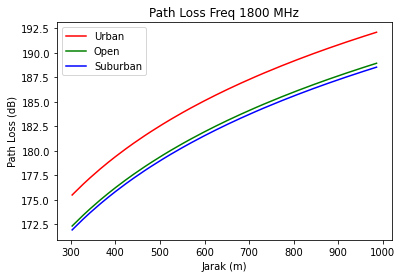

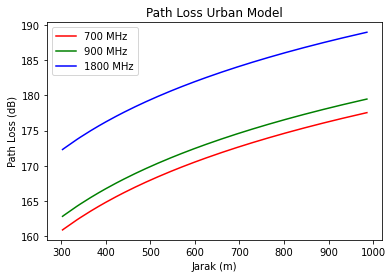

In [35]:
plt.figure()
plt.title('Path Loss Freq 1800 MHz')
plt.plot(d_sort, Urban_sort,'r', label='Urban')
plt.plot(d_sort, Open_sort,'g' ,label='Open')
plt.plot(d_sort, Suburban_sort,'b' ,label='Suburban')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

#Model Urban
plt.figure()
plt.title('Path Loss Urban Model')
plt.plot(d_sort, f2_sort,'r', label='700 MHz')
plt.plot(d_sort, f_sort,'g', label='900 MHz')
plt.plot(d_sort, f3_sort,'b', label='1800 MHz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [36]:
#Daya Transmitter
def daytrans (ht, hl, gt, gr):
  dayter = (10*(np.log(ht))) - hl + gt + gr
  dayter = 10**(dayter/10)
  return dayter

power_tran = 30000
gain_tran = 10
gain_rece = 2

In [37]:
PTUrban = daytrans(power_tran, Urban_sort, gain_tran, gain_rece)
PTSuburban = daytrans(power_tran, Suburban_sort, gain_tran, gain_rece)
PTOpen = daytrans(power_tran, Open_sort, gain_tran, gain_rece)
PTUrban2 = daytrans(power_tran, f_sort, gain_tran, gain_rece)
PTUrban3 = daytrans(power_tran, f2_sort, gain_tran, gain_rece)

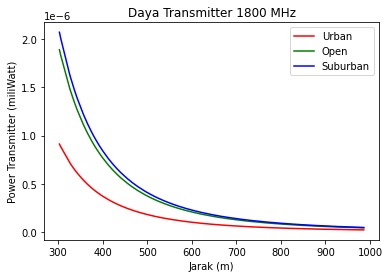

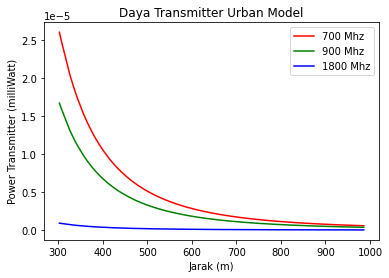

In [38]:
#Frekuensi 1800 MHz
plt.figure()
plt.title("Daya Transmitter 1800 MHz")
plt.plot(d_sort, PTUrban,'r', label = "Urban")
plt.plot(d_sort, PTOpen,'g', label = "Open")
plt.plot(d_sort, PTSuburban,'b', label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (miliWatt)')
plt.legend()
plt.show()

#Model Urban
plt.figure()
plt.title("Daya Transmitter Urban Model")
plt.plot(d_sort, PTUrban3,'r', label = "700 Mhz")
plt.plot(d_sort, PTUrban2,'g', label = "900 Mhz")
plt.plot(d_sort, PTUrban,'b' ,label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (milliWatt)')
plt.legend()
plt.show()

In [39]:
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [40]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

In [41]:
#Signal to Noise Ratio
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [42]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

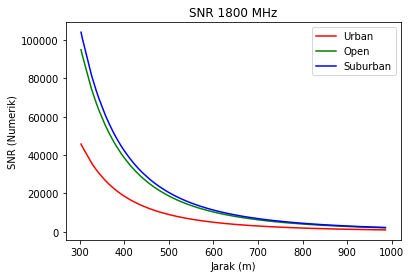

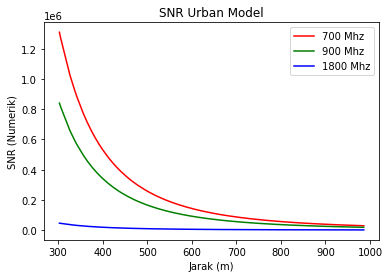

In [43]:
#SNR Frekuensi 1800 MHz
plt.figure()
plt.title("SNR 1800 MHz")
plt.plot(d_sort, SNRUrban,'r', label = "Urban")
plt.plot(d_sort, SNROpen, 'g',label = "Open")
plt.plot(d_sort, SNRSuburban,'b', label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()

#SNR Urban Model
plt.figure()
plt.title("SNR Urban Model")
plt.plot(d_sort, SNRUrban3,'r', label = "700 Mhz")
plt.plot(d_sort, SNRUrban2,'g', label = "900 Mhz")
plt.plot(d_sort, SNRUrban,'b' ,label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()


In [44]:
#Kapasitas Seluler 
def kapasitas (sig, BW):
  kpssel = BW*(np.log2(1+sig))
  return kpssel

In [45]:
KapasitasUrban = kapasitas(SNRUrban, bw)
KapasitasSuburban = kapasitas(SNRSuburban, bw)
KapasitasOpen = kapasitas(SNROpen, bw)
KapasitasUrban2 = kapasitas(SNRUrban2, bw)
KapasitasUrban3 = kapasitas(SNRUrban3, bw)

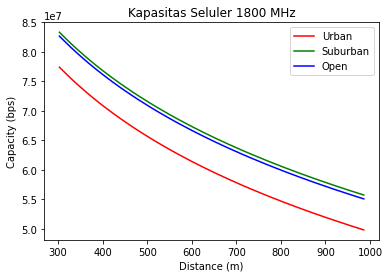

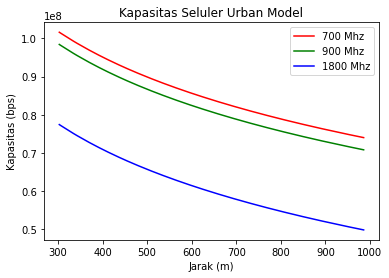

In [46]:
#Kapasitas Seluler 1800 Mhz
plt.figure()
plt.title("Kapasitas Seluler 1800 MHz")
plt.plot(d_sort,KapasitasUrban,'r' ,label = "Urban")
plt.plot(d_sort,KapasitasSuburban,'g' ,label = "Suburban")
plt.plot(d_sort,KapasitasOpen,'b' ,label = "Open")
plt.xlabel('Distance (m)')
plt.ylabel('Capacity (bps)')
plt.legend()
plt.show()

#Kapasitas Seluler Urban Model 
plt.figure()
plt.title("Kapasitas Seluler Urban Model")
plt.plot(d_sort, KapasitasUrban3,'r', label = "700 Mhz")
plt.plot(d_sort, KapasitasUrban2,'g', label = "900 Mhz")
plt.plot(d_sort, KapasitasUrban, 'b',label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()